In [91]:
#Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

#Preprocessing frameworks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Model selection frameworks
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate

#Algorithms for the model
from sklearn.ensemble import RandomForestRegressor

#Measurements for regression problem
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

# Load Dataset

In [95]:
data = pd.read_csv(r"C:\Users\cvveljanovski\Desktop\Learning\DataScience\Datasets\Covid-19_on_economy_per_nation\transformed_data.csv")

In [96]:
data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


# Dataset details

### Description of the dataset
HDI - human_development_index,
TC - total cases,
TD - total deaths,
STI - stringency_index,
Pop - Population,
GDPCAP - GDP per capita,

In [7]:
data.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


### Lets understand the features of the dataset in order to understand the problem that we want to analyze

#### 1. Human Development Indexs (HDI)
The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

#### 2. Stringency Index (STI)
It is among the metrics being used by the Oxford COVID-19 Government Response Tracker.
The Tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
These indicators examine containment policies such as school and workplace closings, public events, public transport, stay-at-home policies.
The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.

#### 3. GDP Per Capita (GDPCAP)
A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 10 columns):
CODE      50418 non-null object
HDI       50418 non-null float64
TC        50418 non-null float64
TD        50418 non-null float64
STI       50418 non-null float64
POP       50418 non-null float64
GDPCAP    50418 non-null float64
day       50418 non-null int64
month     50418 non-null int64
year      50418 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.8+ MB


# Dataset cleanup and preparation

In [13]:
#Check if there are missing values
data.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

#### We will populate the missing values with the mean value of the column to avoid impacting the distribution

In [12]:
data['HDI'] = data['HDI'].fillna(data['HDI'].mean())

#### Drop duplicate features to reduce the dimensionality of the dataset

In [14]:
data.drop(["COUNTRY"],inplace=True,axis=1)

In [ ]:
# We will split the date feature in three features date, month and day
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce') # Convert the feature from type object to type date
data["day"] = data["DATE"].dt.day
data["month"] = data["DATE"].dt.month
data["year"] = data["DATE"].dt.year
data.drop(["DATE"],inplace=True,axis=1) # Now we can drop the DATE feature since it is duplicate and we don't need it

In [53]:
# Lets label encode the feature with string values CODE

# Store the categorical feature in one dataset
str_cat = data.select_dtypes(include=["object"])

# Store the numerical features in another dataset
num = data.select_dtypes(exclude=["object"])

# I am going to use label encoding that will substitute each string value with a specific number
str_cat = str_cat.apply(LabelEncoder().fit_transform)

# Concatenate str_cat and num into one dataset that contains only numerical values for both categorical and continuous features
df = pd.concat([str_cat, num],axis=1)
df.head()

,CODE,HDI,TC,TD,STI,POP,GDPCAP,day,month,year
0,1,0.498,0.0,0.0,0.0,17.477233,7.497754,31,12,2019
1,1,0.498,0.0,0.0,0.0,17.477233,7.497754,1,1,2020
2,1,0.498,0.0,0.0,0.0,17.477233,7.497754,2,1,2020
3,1,0.498,0.0,0.0,0.0,17.477233,7.497754,3,1,2020
4,1,0.498,0.0,0.0,0.0,17.477233,7.497754,4,1,2020


# Data analysis

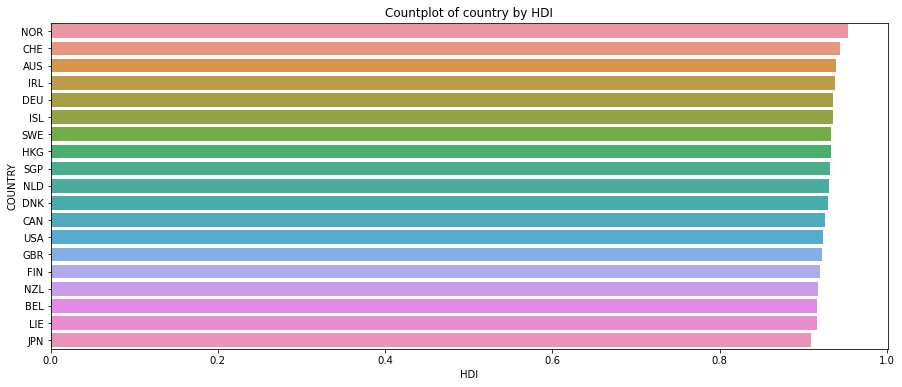

In [43]:
# top Countries ordered by the HDI feature
hdi = data.sort_values(by='HDI', ascending=False)[:5000]
figure = plt.figure(figsize=(15,6))
sns.barplot(y=hdi.CODE, x=hdi.HDI)
plt.xticks()
plt.xlabel('HDI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by HDI')
plt.show()

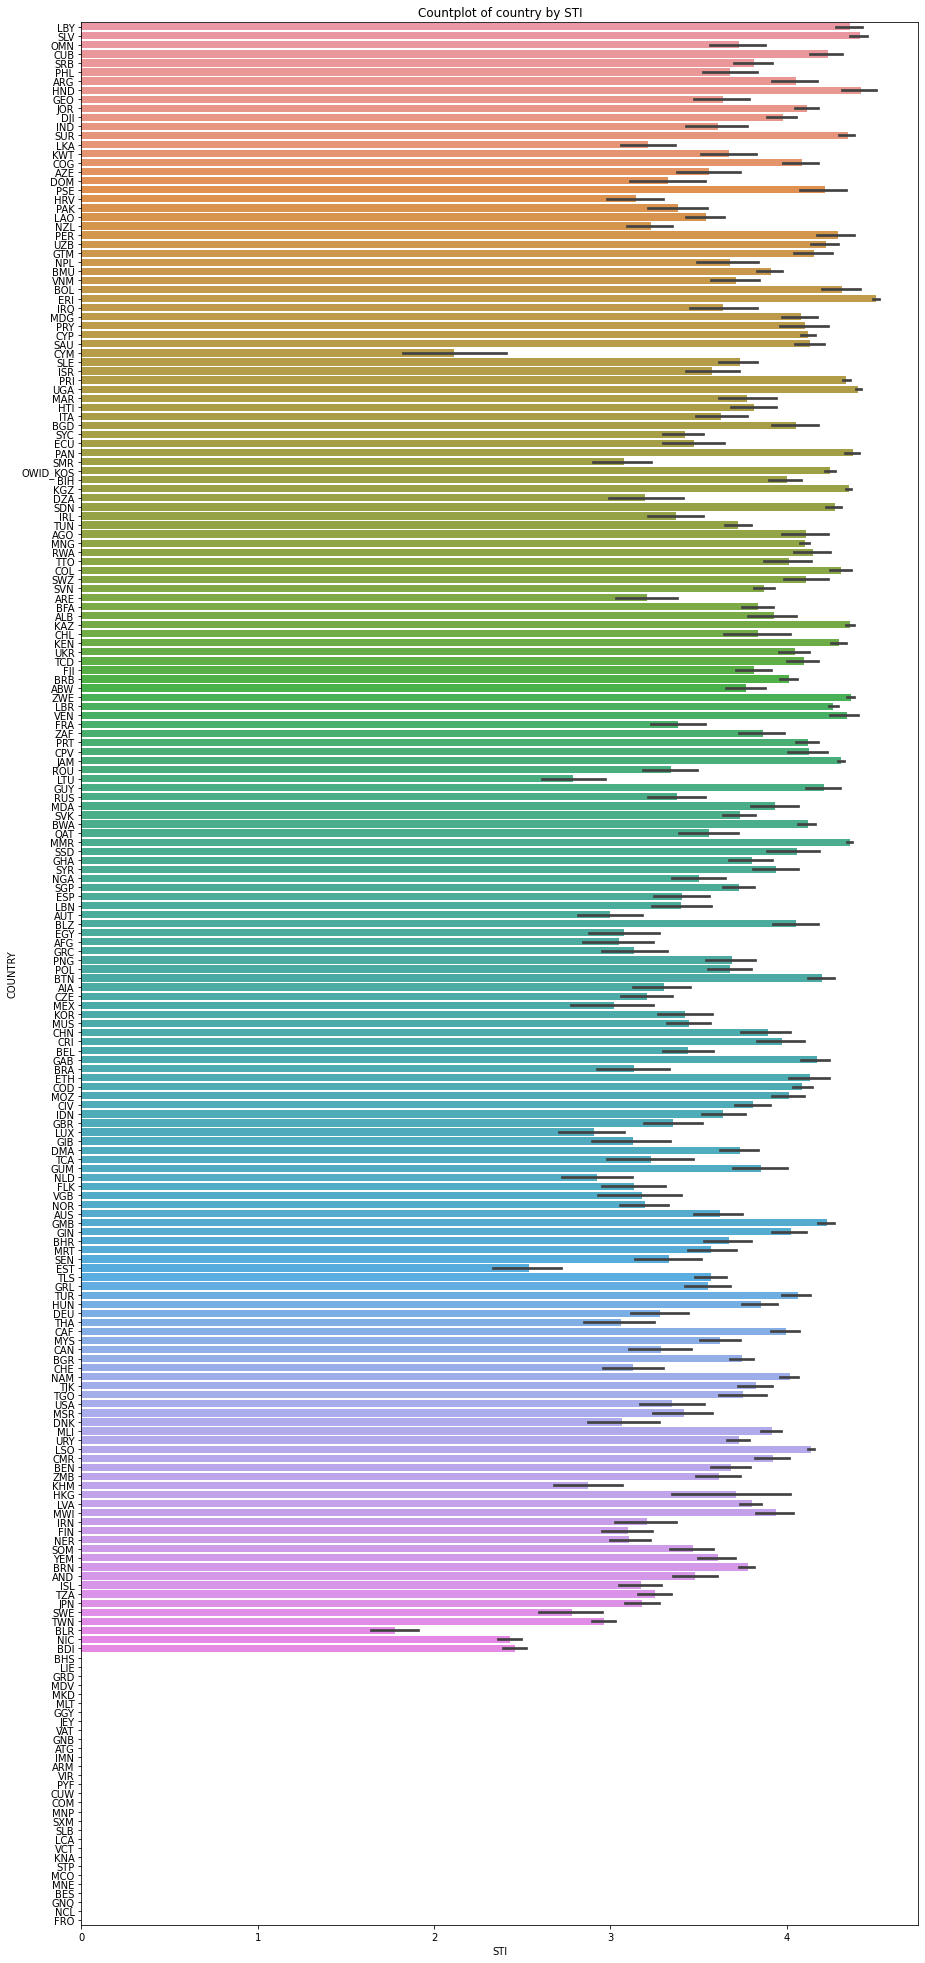

In [52]:
# Countries ordered by the STI feature
sti = data.sort_values(by='STI', ascending=False)[:]
figure = plt.figure(figsize=(15,35))
sns.barplot(y=sti.CODE, x=sti.STI)
plt.xticks()
plt.xlabel('STI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by STI')
plt.show()

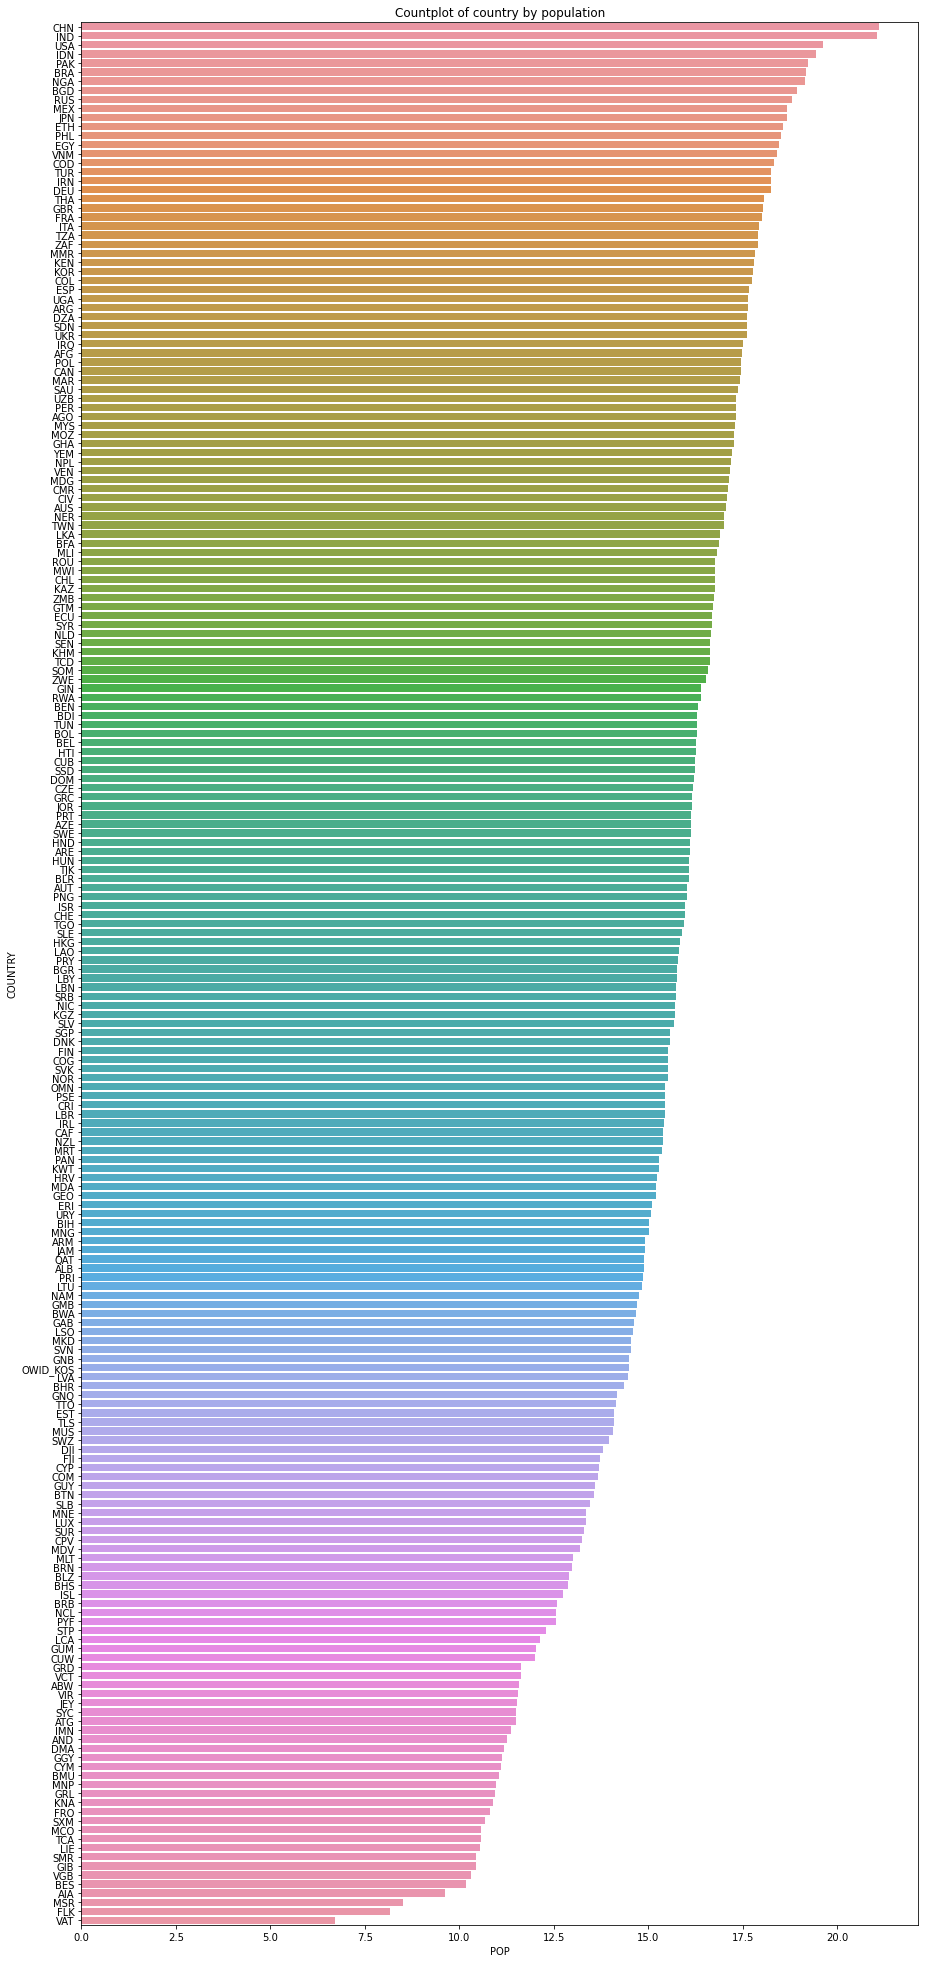

In [50]:
# Countries ordered by the Pop feature
pop = data.sort_values(by='POP', ascending=False)[:]
figure = plt.figure(figsize=(15,35))
sns.barplot(y=pop.CODE, x=pop.POP)
plt.xticks()
plt.xlabel('POP')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by population')
plt.show()

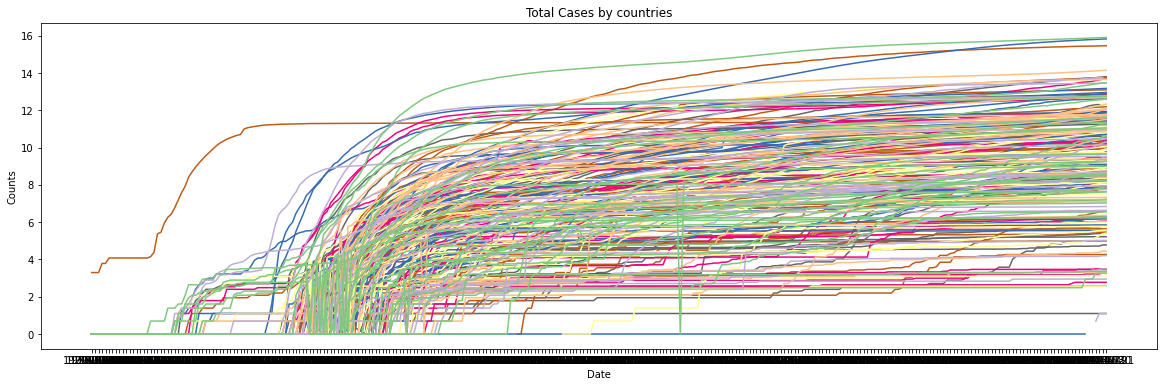

In [97]:
fig, ax = plt.subplots(figsize = (20, 6))

sns.lineplot(data=data, x='DATE', y='TC', hue='COUNTRY', legend=False, palette='Accent_r')

ax.set_title("Total Cases by countries")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

In [98]:
def impact(x):
    y = data[['CODE','COUNTRY','DATE','HDI','TC','TD','STI','POP','GDPCAP']][data["COUNTRY"] == x]
    y = y.sort_values(by="CODE",ascending=False)
    return y.head(15)

In [99]:
impact("Macedonia")

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
27987,MKD,Macedonia,2019-12-31,0.757,0.000000,0.000000,0.0,14.549502,9.481223
28171,MKD,Macedonia,2020-07-02,0.757,8.774931,5.723585,0.0,14.549502,9.481223
28187,MKD,Macedonia,2020-07-18,0.757,9.079320,6.006353,0.0,14.549502,9.481223
28186,MKD,Macedonia,2020-07-17,0.757,9.060912,5.993961,0.0,14.549502,9.481223
28185,MKD,Macedonia,2020-07-16,0.757,9.050406,5.973810,0.0,14.549502,9.481223
28184,MKD,Macedonia,2020-07-15,0.757,9.027379,5.963579,0.0,14.549502,9.481223
28183,MKD,Macedonia,2020-07-14,0.757,9.011524,5.953243,0.0,14.549502,9.481223
28182,MKD,Macedonia,2020-07-13,0.757,9.000976,5.945421,0.0,14.549502,9.481223
28181,MKD,Macedonia,2020-07-12,0.757,8.983063,5.926926,0.0,14.549502,9.481223
28180,MKD,Macedonia,2020-07-11,0.757,8.958025,5.905362,0.0,14.549502,9.481223


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 

Text(0, 0.5, 'Counts')

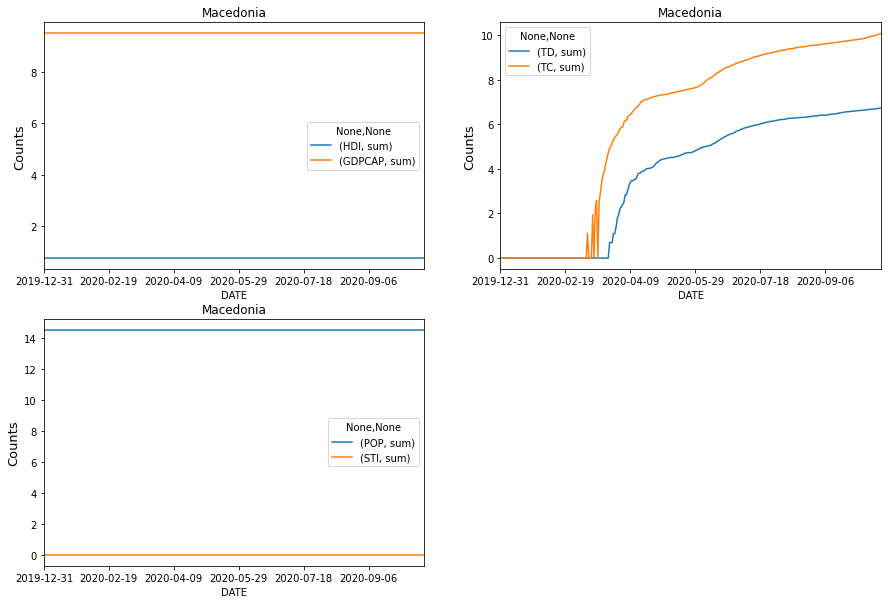

In [100]:
HDI= data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'HDI':['sum']})
GDPCAP = data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'GDPCAP':['sum']})
total1= HDI.join(GDPCAP)

TD= data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'TD':['sum']})
TC = data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'TC':['sum']})
total2= TD.join(TC)

POP= data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'POP':['sum']})
STI = data[data['COUNTRY']=='Macedonia'].groupby(['DATE']).agg({'STI':['sum']})
total3= POP.join(STI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total1.plot(ax=plt.gca(), title='Macedonia')
plt.ylabel("Counts", size=13)

plt.subplot(2, 2, 2)
total2.plot(ax=plt.gca(), title='Macedonia')
plt.ylabel("Counts", size=13)


plt.subplot(2, 2, 3)
total3.plot(ax=plt.gca(), title='Macedonia')
plt.ylabel("Counts", size=13)

In [108]:
# Unoftunately we don't have the value for STI for Macedonia, but we can see that the deaths and the cases increases over the time

In [102]:
impact("Italy")

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
23405,ITA,Italy,2019-12-31,0.88,0.000000,0.000000,0.000000,17.917523,10.469372
23589,ITA,Italy,2020-07-02,0.88,12.391556,10.457028,4.017464,17.917523,10.469372
23605,ITA,Italy,2020-07-18,0.88,12.404788,10.463903,4.066117,17.917523,10.469372
23604,ITA,Italy,2020-07-17,0.88,12.403841,10.463589,4.066117,17.917523,10.469372
23603,ITA,Italy,2020-07-16,0.88,12.402897,10.463018,4.066117,17.917523,10.469372
23602,ITA,Italy,2020-07-15,0.88,12.402231,10.462646,4.066117,17.917523,10.469372
23601,ITA,Italy,2020-07-14,0.88,12.401763,10.462160,4.066117,17.917523,10.469372
23600,ITA,Italy,2020-07-13,0.88,12.401068,10.461788,4.066117,17.917523,10.469372
23599,ITA,Italy,2020-07-12,0.88,12.400105,10.461531,4.066117,17.917523,10.469372
23598,ITA,Italy,2020-07-11,0.88,12.399330,10.461330,4.066117,17.917523,10.469372


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 

Text(0, 0.5, 'Counts')

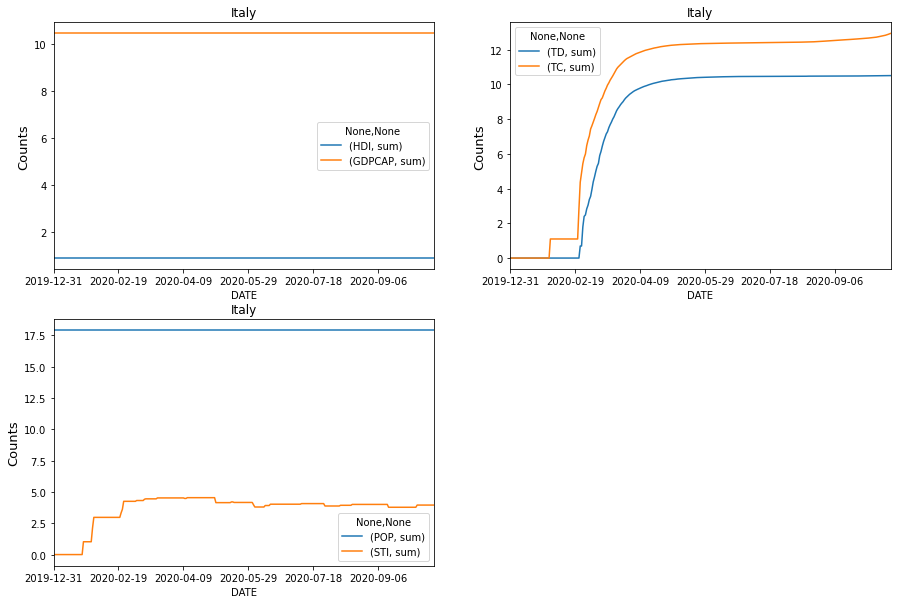

In [103]:
HDI= data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'HDI':['sum']})
GDPCAP = data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'GDPCAP':['sum']})
total1= HDI.join(GDPCAP)

TD= data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'TD':['sum']})
TC = data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'TC':['sum']})
total2= TD.join(TC)

POP= data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'POP':['sum']})
STI = data[data['COUNTRY']=='Italy'].groupby(['DATE']).agg({'STI':['sum']})
total3= POP.join(STI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total1.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Counts", size=13)

plt.subplot(2, 2, 2)
total2.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Counts", size=13)


plt.subplot(2, 2, 3)
total3.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Counts", size=13)

In [109]:
# Italy is slowely decreasing the number of new cases and deaths and as we can see the STI was impacted with the start of the pandemic

In [104]:
impact("China")

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
9841,CHN,China,2019-12-31,0.752,3.295837,0.000000,0.000000,21.087439,9.636177
10025,CHN,China,2020-07-02,0.752,11.348239,8.442685,4.405987,21.087439,9.636177
10041,CHN,China,2020-07-18,0.752,11.355137,8.443547,4.405987,21.087439,9.636177
10040,CHN,China,2020-07-17,0.752,11.354199,8.443331,4.405987,21.087439,9.636177
10039,CHN,China,2020-07-16,0.752,11.353296,8.443331,4.405987,21.087439,9.636177
10038,CHN,China,2020-07-15,0.752,11.353062,8.442901,4.405987,21.087439,9.636177
10037,CHN,China,2020-07-14,0.752,11.352428,8.442901,4.405987,21.087439,9.636177
10036,CHN,China,2020-07-13,0.752,11.351782,8.442685,4.405987,21.087439,9.636177
10035,CHN,China,2020-07-12,0.752,11.351241,8.442685,4.405987,21.087439,9.636177
10034,CHN,China,2020-07-11,0.752,11.350830,8.442685,4.405987,21.087439,9.636177


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 

Text(0, 0.5, 'Counts')

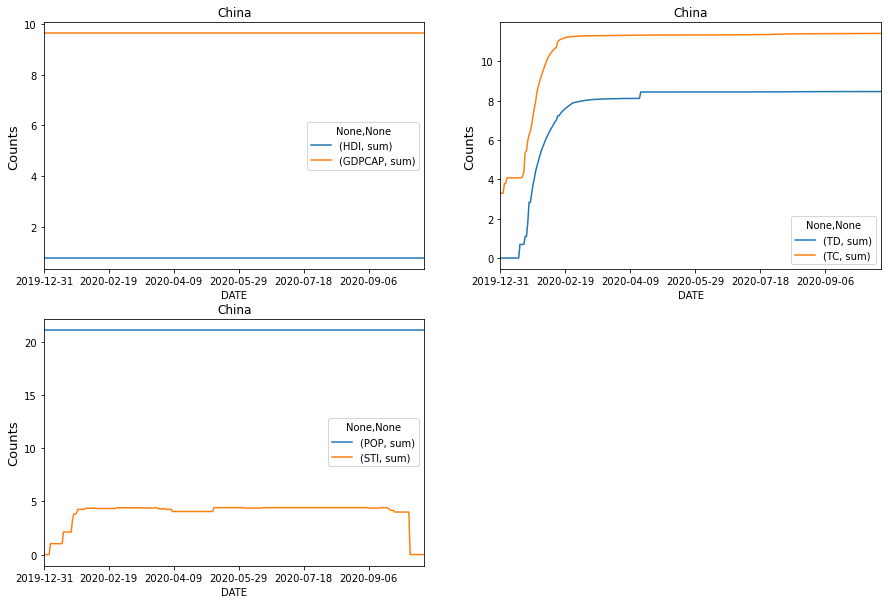

In [105]:
HDI= data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'HDI':['sum']})
GDPCAP = data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'GDPCAP':['sum']})
total1= HDI.join(GDPCAP)

TD= data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'TD':['sum']})
TC = data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'TC':['sum']})
total2= TD.join(TC)

POP= data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'POP':['sum']})
STI = data[data['COUNTRY']=='China'].groupby(['DATE']).agg({'STI':['sum']})
total3= POP.join(STI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total1.plot(ax=plt.gca(), title='China')
plt.ylabel("Counts", size=13)

plt.subplot(2, 2, 2)
total2.plot(ax=plt.gca(), title='China')
plt.ylabel("Counts", size=13)


plt.subplot(2, 2, 3)
total3.plot(ax=plt.gca(), title='China')
plt.ylabel("Counts", size=13)

In [110]:
# China as the first coutry to be impacted by Covid-19 has stabilized the number of deaths and new cases and as we can see
# the STI index was impacted but in the last months it fell down back to its previous values

In [27]:
#Now it will be good also to perform normalzation (i.e. to transform the values in the range from 0 to 1)
#But before we do the transformations lets analyse the distributions of the features

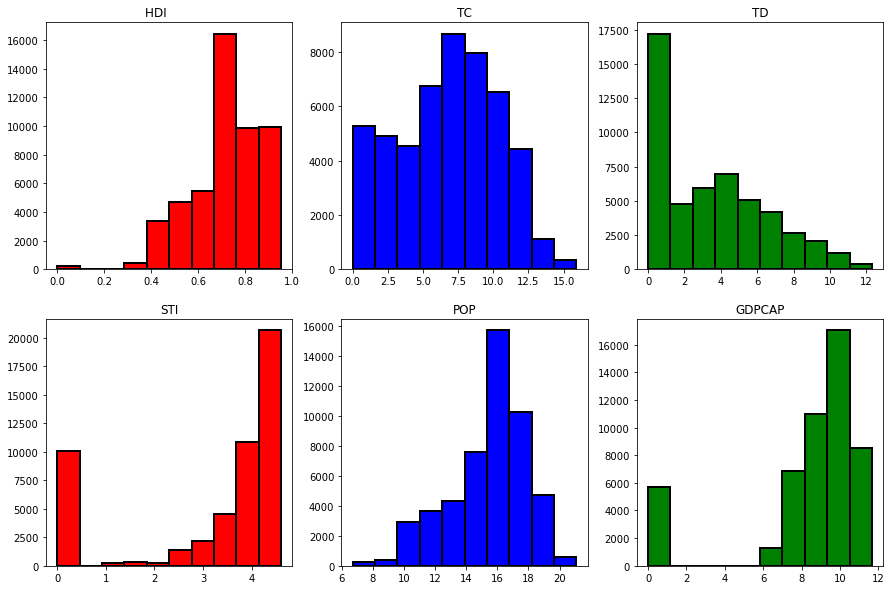

In [31]:
fig, axes = plt.subplots(2,3)
axes[0,0].hist(x="HDI", data=data, edgecolor="black", linewidth=2, color="red")
axes[0,0].set_title("HDI       ")
axes[0,1].hist(x="TC", data=data, edgecolor="black", linewidth=2, color="blue")
axes[0,1].set_title("TC")
axes[0,2].hist(x="TD", data=data, edgecolor="black", linewidth=2, color="green")
axes[0,2].set_title("TD")

axes[1,0].hist(x="STI", data=data, edgecolor="black", linewidth=2, color="red")
axes[1,0].set_title("STI")
axes[1,1].hist(x="POP", data=data, edgecolor="black", linewidth=2, color="blue")
axes[1,1].set_title("POP")
axes[1,2].hist(x="GDPCAP", data=data, edgecolor="black", linewidth=2, color="green")
axes[1,2].set_title("GDPCAP")
fig.set_size_inches(15,10)

#### As we can see the features are not normally distributed se we should normalize them

In [57]:
# Store the names of the columns in a list colls
df_std = df.drop("GDPCAP",axis=1)
std_col = df_std.columns
std_col

Index(['CODE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'day', 'month', 'year'], dtype='object')

In [58]:
sc = StandardScaler()
df_std = sc.fit_transform(df_std)
df_std = pd.DataFrame(df_std)
df_std.columns = std_col
df_std.head()

,CODE,HDI,TC,TD,STI,POP,day,month,year
0,-1.699786,-1.474252,-1.8591,-1.107356,-1.899624,0.815681,1.760737,2.393071,-27.620809
1,-1.699786,-1.474252,-1.8591,-1.107356,-1.899624,0.815681,-1.664335,-2.057563,0.036205
2,-1.699786,-1.474252,-1.8591,-1.107356,-1.899624,0.815681,-1.550166,-2.057563,0.036205
3,-1.699786,-1.474252,-1.8591,-1.107356,-1.899624,0.815681,-1.435997,-2.057563,0.036205
4,-1.699786,-1.474252,-1.8591,-1.107356,-1.899624,0.815681,-1.321828,-2.057563,0.036205


# Split the dataset in training and testing

In [61]:
X = df_std
Y = data.GDPCAP

In [66]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size = 0.5, random_state=0)

In [67]:
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp, test_size = 0.4, random_state=0)

# Building the base regression model for prediction before optimizing it

In [79]:
# Define and train model then predict
clf = RandomForestRegressor(n_estimators = 100)
model=clf.fit(X_train,Y_train)
val_pred=clf.predict(X_val)

# Check the performance of the model
rmse = []
rmse.append(np.sqrt(mean_squared_error(val_pred,Y_val)))
r2 = []
r2.append(r2_score(val_pred,Y_val))
d={'RMSE':rmse}   
d1={'R2': r2}
print(d,d1)

{'RMSE': [0.02356162548214854]} {'R2': [0.9999449191556099]}


#### This model is pretty good since we have an R squared value close to 1 and very low RMSE value but lets try to optimize it

In [80]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_train, Y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
1.5169 ± 0.0176,POP
0.8395 ± 0.0067,HDI
0.5361 ± 0.0222,CODE
0.0278 ± 0.0018,STI
0.0133 ± 0.0008,month
0.0000 ± 0.0000,TD
0.0000 ± 0.0000,TC
0.0000 ± 0.0000,day
-0.0000 ± 0.0000,year


In [ ]:
# Here we can see that the features that have the biggest impact of predicting the GDP per capita value are "Population" and "HDI"
# So we are going to take those two features now for our new model

In [81]:
X_new = df_std[["POP", "HDI"]]

In [84]:
X_n_train, X_n_temp, Y_n_train, Y_n_temp = train_test_split(X_new,Y, test_size = 0.5, random_state=0)

In [86]:
X_n_val, X_n_test, Y_n_val, Y_n_test = train_test_split(X_n_temp, Y_n_temp, test_size = 0.5, random_state=0)

In [87]:
# Define and train model then predict
clf_n = RandomForestRegressor(n_estimators = 100)
model_n=clf_n.fit(X_n_train,Y_n_train)
val_pred_n=clf_n.predict(X_n_val)

# Check the performance of the model
rmse = []
rmse.append(np.sqrt(mean_squared_error(val_pred_n,Y_n_val)))
r2 = []
r2.append(r2_score(val_pred_n,Y_n_val))
d={'RMSE':rmse}   
d1={'R2': r2}
print(d,d1)

{'RMSE': [0.0025054087302175247]} {'R2': [0.9999993759447494]}


In [ ]:
# Here we can see that the R2 value is pretty much 1 and the Root mean squared error is almost 0, this means that we
# optimized our model bu selecting the best features for the prediction